In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline
data = pd.read_csv('data/NO2.csv')
data.describe()

,X,Y,Année,Valeur
count,75180.000000,75180.000000,75180.000000,75180.000000
mean,2.353831,48.831532,2014.500000,28.311618
std,0.250610,0.143905,1.707836,10.193551
min,1.478409,48.135696,2012.000000,2.114619
25%,2.237453,48.779928,2013.000000,21.747601
50%,2.352290,48.852873,2014.500000,28.052457
75%,2.463317,48.914936,2016.000000,34.734763
max,3.466546,49.208257,2017.000000,110.617037


## SCATTER & MAPPING

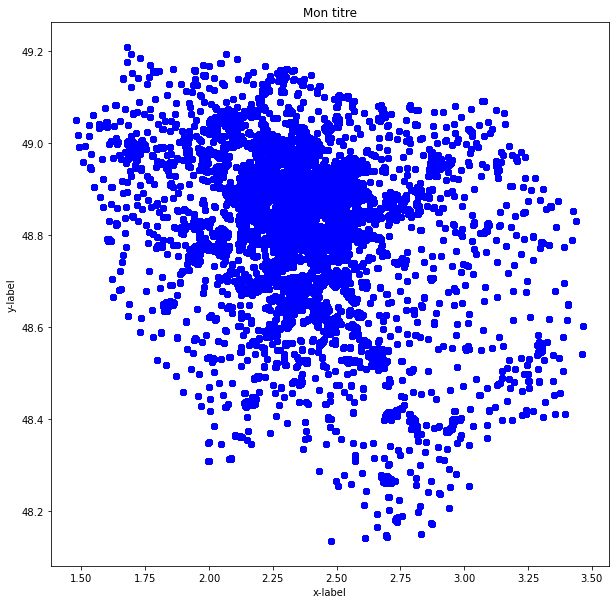

In [2]:
pp.figure(figsize=(10,10))
pp.title("Mon titre")
pp.xlabel("x-label")
pp.ylabel("y-label")
pp.scatter(data.X,data.Y,color='b')

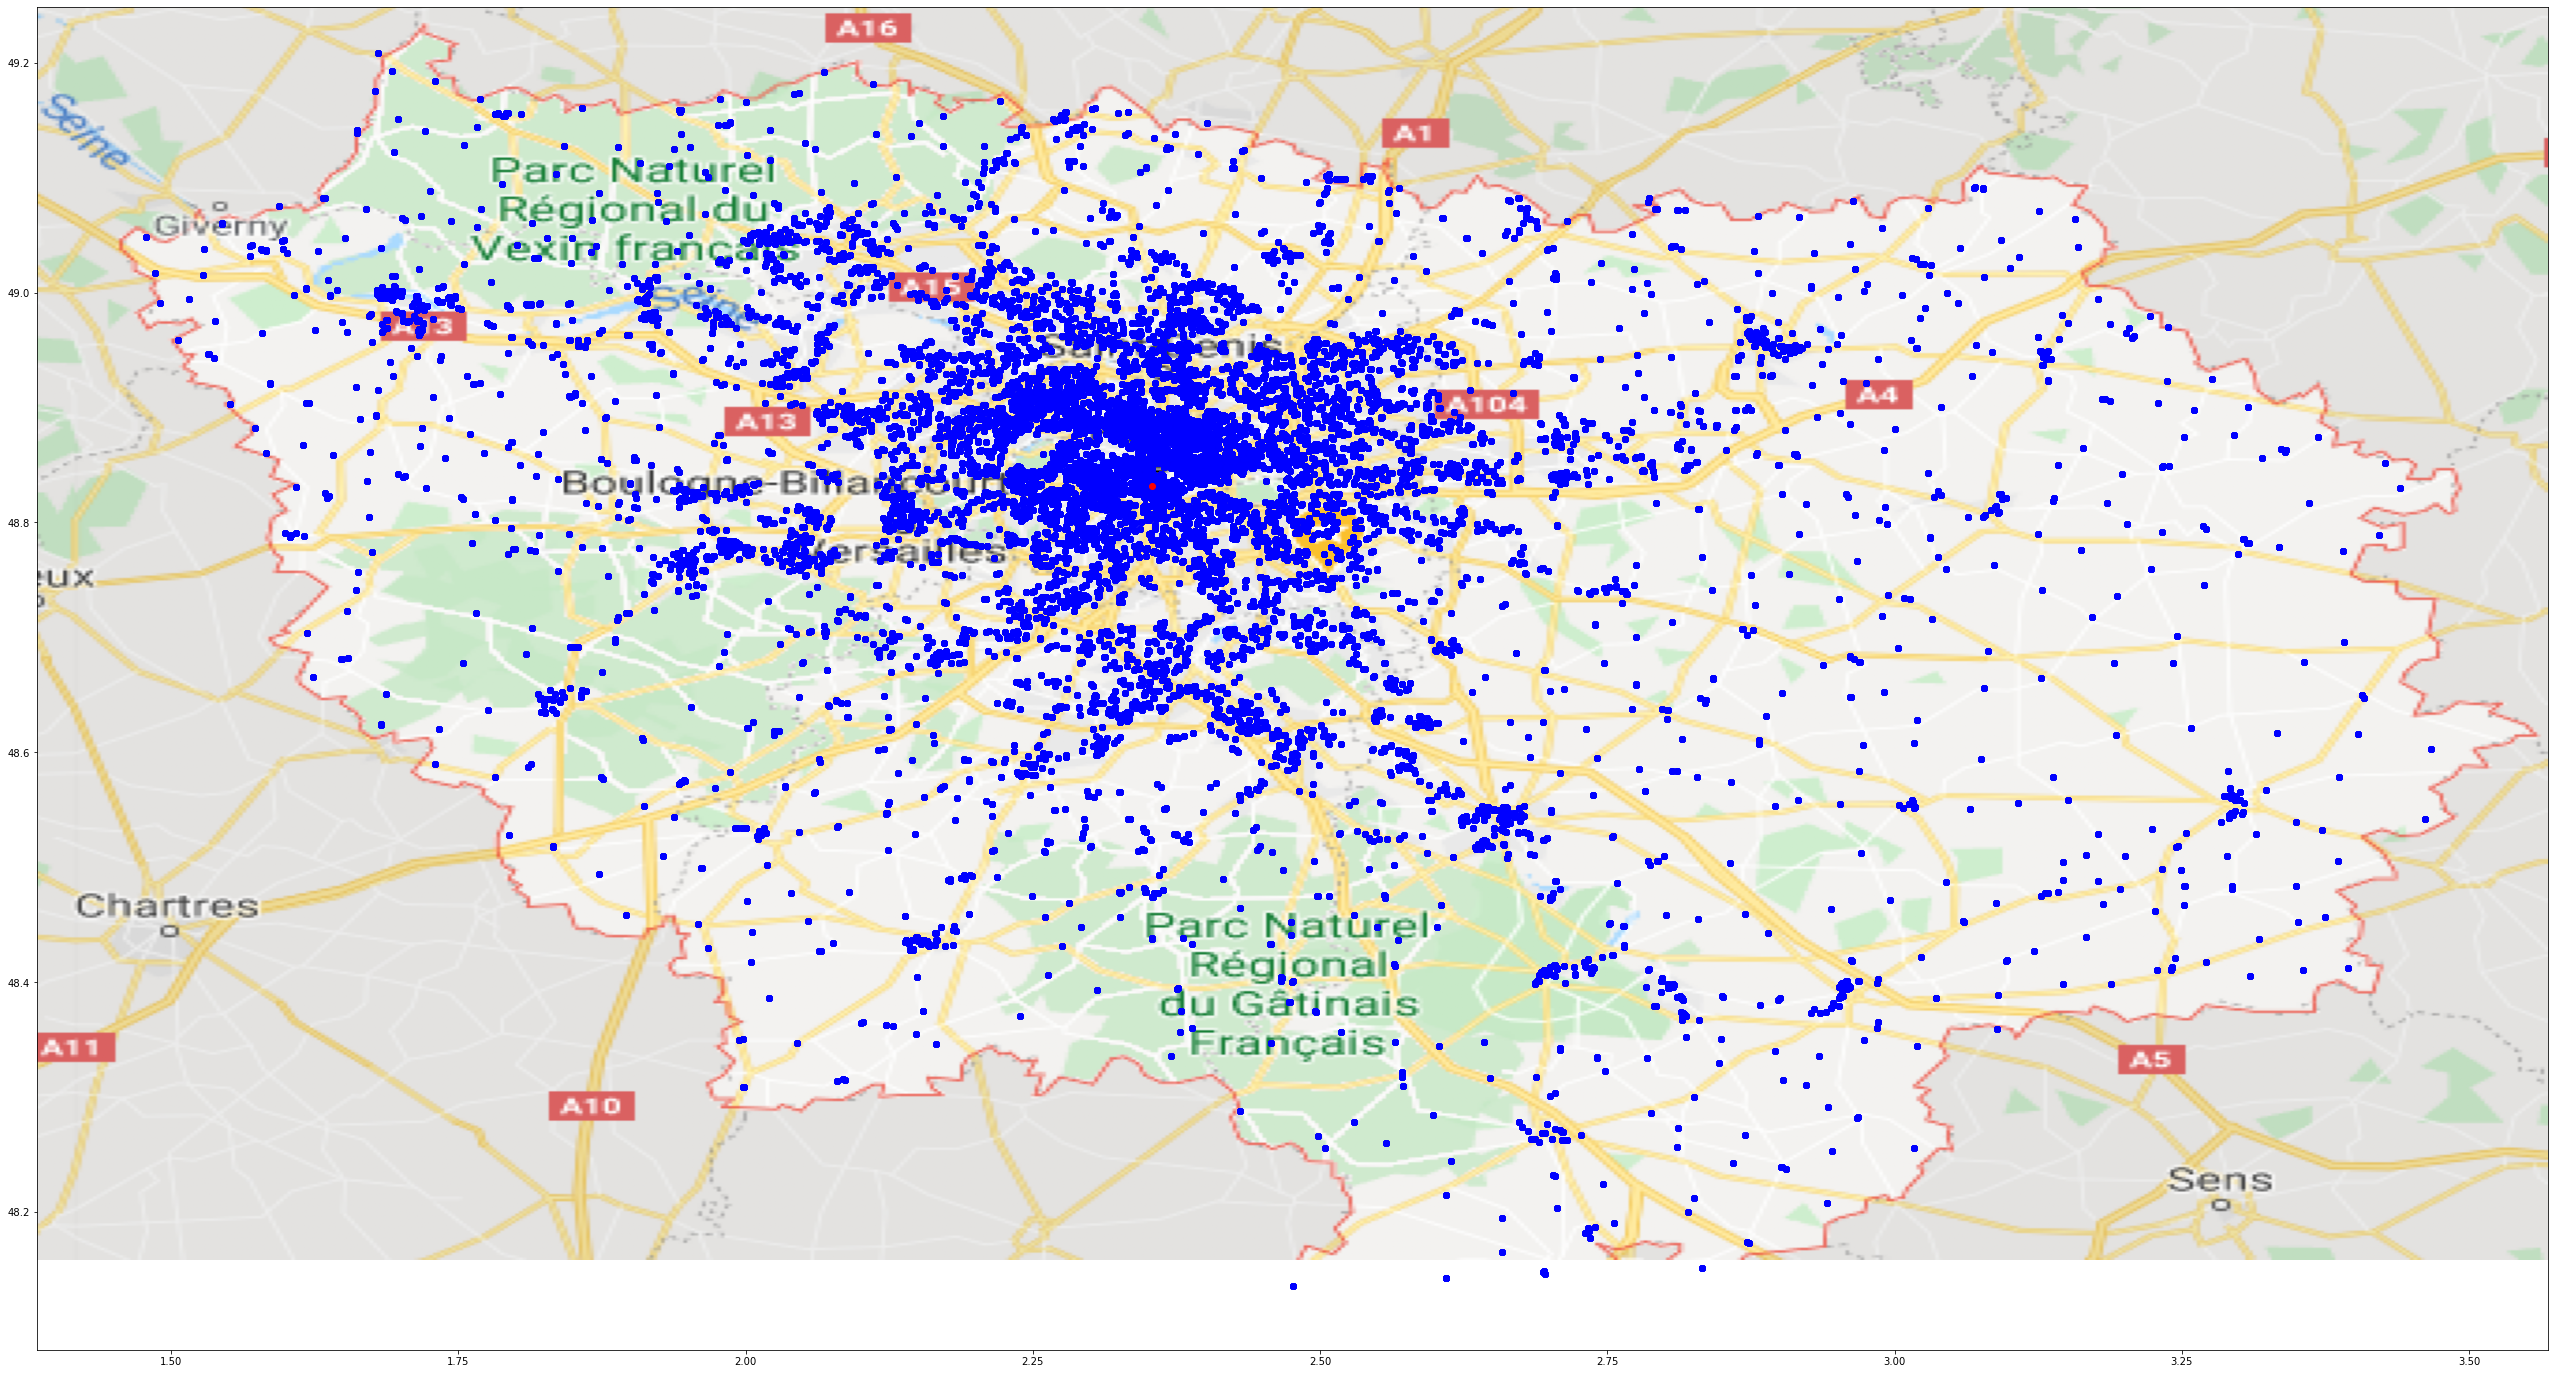

In [3]:
# IMPORT IMAGE FOR PLOTING POINT ON BACKGROUND
# read image to import
img = matplotlib.image.imread('data/Ile_De_France.PNG')
# dimension figure size
pp.figure(figsize=(45,45))
# Give image coordinate for correct plotting (used min max of data on X & Y)
pp.imshow(img,extent=[1.383068, 3.568193, 48.158109, 49.248776])

# plot all data in dataframe
pp.scatter(data.X,data.Y,color='b') # blue
# plot mean value
pp.scatter(data.X.mean(),data.Y.mean(),color='r') # red

In [4]:
# CREATING NEW COLUMN IN WHICH ALL DATA ARE SEPARATED INTO ZONES FROM POSITION MEAN VALUE
data['Région']='NE'
data.loc[ (data.X<=data.X.mean()) & (data.Y>=data.Y.mean()) , 'Région']= 'NO'
data.loc[ (data.X>data.X.mean()) & (data.Y<data.Y.mean())  , 'Région']= 'SE'
data.loc[ (data.X<=data.X.mean()) & (data.Y<data.Y.mean())  , 'Région']= 'SO'

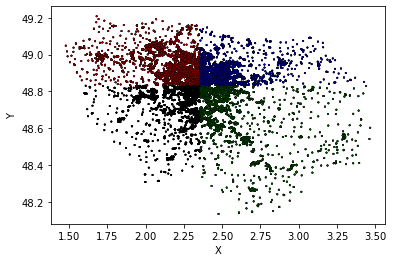

In [5]:
# PLOT DATA BY ASSOCIATING DICTIONNARY TO COLUMN VALUES
# here each region value is associated with color letter
def plotAlldata():     
    colors = data.Région.map({'NO': 'r', 'NE': 'b', 'SE': 'g', 'SO': 'k'})   
    data.plot.scatter('X','Y',
                       c=colors,s=2,linewidths=0.5,edgecolor='k',alpha=0.5)
plotAlldata()

## BARPLOT (HISTOGRAM)

(2.0, 60.0, 0.0, 0.048218681799586674)

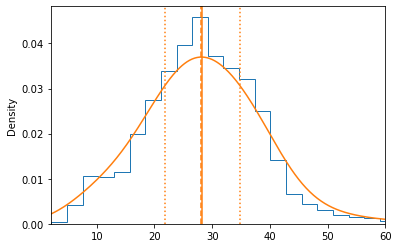

In [6]:
# PLOT FROM DATA FRAME (BINS = number of bars) [density] is mandatory only if plotting density
data.Valeur.plot(kind='hist',histtype='step',bins=40, density=True)

# PLOT DENSITY VALUE OF DATA
data.Valeur.plot.density(bw_method=0.5)

# ADDING LINES TO MATERIALISE MEAN QUANTILE ETC
pp.axvline(data.Valeur.mean(),c='C1')
pp.axvline(data.Valeur.median(),c='C1',linestyle='--')
pp.axvline(data.Valeur.quantile(0.25),c='C1',linestyle=':')
pp.axvline(data.Valeur.quantile(0.75),c='C1',linestyle=':')

# RESIZE AXIS
pp.axis(xmin=2,xmax=60)

## BOX

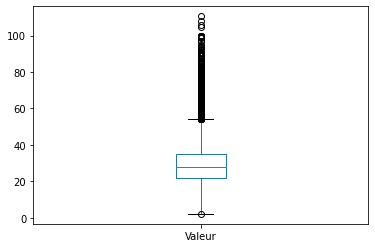

In [7]:
data.Valeur.plot(kind='box')

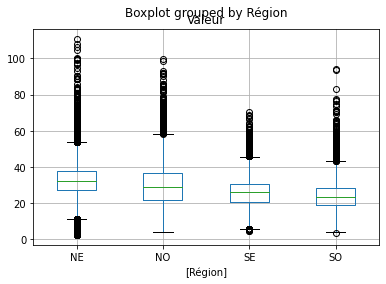

In [8]:
# SEGREGATE DATA WHEN PLOTTING BOX
df = data[['Valeur','Région']]
df.boxplot(by='Région')

## COMPARING VARIABLE OF DATA

In [9]:
data = pd.read_csv('data/carddata.csv')
data.head(10)

,id,chd,cat,age,chl,smk,ecg,dbp,sbp,hpt,ch,cc
0,21,0,0,56,270,0,0,80,138,0,0,0
1,31,0,0,43,159,1,0,74,128,0,0,0
2,51,1,1,56,201,1,1,112,164,1,1,201
3,71,0,1,64,179,1,0,100,200,1,1,179
4,74,0,0,49,243,1,0,82,145,0,0,0
5,91,0,0,46,252,1,0,88,142,0,0,0
6,111,1,0,52,179,1,1,80,128,0,0,0
7,131,0,0,63,217,0,0,92,135,0,0,0
8,141,0,0,42,176,1,0,76,114,0,0,0
9,191,0,0,55,250,0,1,114,182,1,0,0


**id** : identifiant unique d'un homme. 

**chd** : la variable à expliquer. Cette variable prend la valeur 1 pour indiquer que la maladie est présente, sinon, elle prend la valeur 0.

**cat** : si elle vaut 1 alors la catécholamine a été détectée élevée. Sinon elle vaut 0.

**age** : indique l'âge d'un homme. 

**chl** : indique le taux de cholesterol

**smk** : elle vaut 1 si l'individu est fumeur, elle vaut 0 sinon.

**ecg** : si elle vaut 1, alors un électrocardiogramme anormal a été réalisé sur l'individu, elle vaut 0 sinon. 

**dbp** : indique la pression artérielle diastolique. 

**sbp** : indique la pression artérielle systolique.

**hpt** : elle vaut 1 pour indiquer la présence d'une forte pression sanguine chez l'individu, sinon elle vaut 0.

**ch** : le produit des deux variables cat*hpt. Cette variable vaut 1 si l'individu a présenté un niveau élevé de catécholamine et une forte pression sanguine. Elle vaut 0 si l'individu n'a présenté ni un niveau élevé de catécholamine ni une forte pression sanguine. 

**cc** : le produit des deux variables  cat*chl.  Cette variable rapporte donc le niveau de cholestérol uniquement pour les hommes ayant présenté un niveau élevé de catécholamine.  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd0020d5e0>,
      dtype=object)

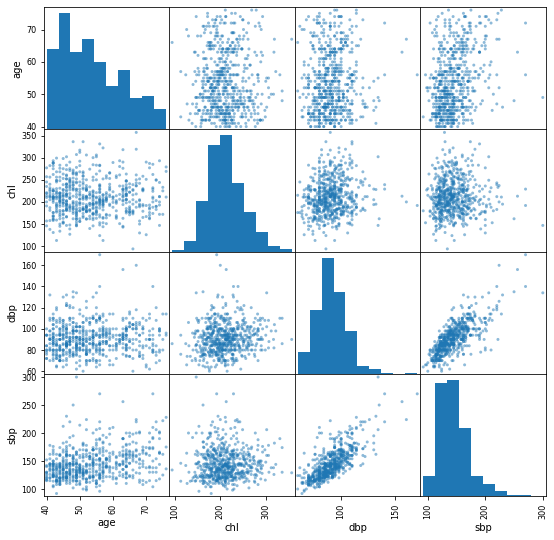

In [10]:
# PLOT COMPARATIVE MATRIX OF SEVERAL QUANTITATIVE VARIABLE
extract1 = data[['age', 'chl','dbp','sbp']]
pd.plotting.scatter_matrix(extract1,figsize=(9,9))

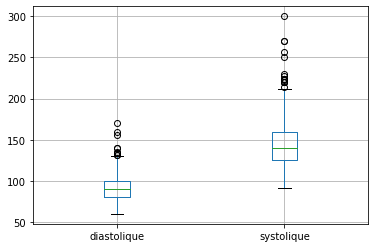

In [11]:
# PLOT 2 VARIABLE IN BOX NEXT TO EACH OTHER
pd.DataFrame({ 'diastolique': data.dbp, 'systolique' : data.sbp}).boxplot()